In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("FuelConsumptionCo2.csv")

# take a look at the dataset
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [3]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244


In [4]:
X=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']]
X.shape

(1067, 6)

In [5]:
X=np.array(X)

In [6]:
X

array([[ 2. ,  4. ,  9.9,  6.7,  8.5, 33. ],
       [ 2.4,  4. , 11.2,  7.7,  9.6, 29. ],
       [ 1.5,  4. ,  6. ,  5.8,  5.9, 48. ],
       ...,
       [ 3. ,  6. , 13.4,  9.8, 11.8, 24. ],
       [ 3.2,  6. , 12.9,  9.3, 11.3, 25. ],
       [ 3.2,  6. , 14.9, 10.2, 12.8, 22. ]])

In [7]:
y=df[['CO2EMISSIONS']]
y.shape

(1067, 1)

In [8]:
y=np.array(y)
y

array([[196],
       [221],
       [136],
       ...,
       [271],
       [260],
       [294]])

In [9]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [10]:
reg = LinearRegression().fit(X,y)
reg.coef_, reg.intercept_

(array([[  8.57767262,   7.698747  , -10.59262337,  -3.48918281,
          17.75286099,  -3.86924281]]),
 array([253.53120115]))

In [11]:
y_pred = reg.predict(X)
y_pred.shape

(1067, 1)

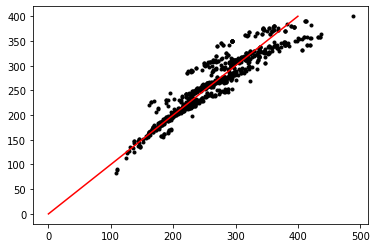

In [12]:
plt.plot(y, y_pred, '.k')
plt.plot(np.linspace(0,400,200), np.linspace(0,400,200), '-r')
plt.show()

In [13]:
#the (euclidean) distance between two vectors
def distance(a,b):
    return np.linalg.norm(np.subtract(a,b))

#batch gradient descent
def batchGradientDescent(X, y, model, learningRate,l2):
    count = 1
    while count < 2000:
        print(model)
        print(count)
        N_data = len(X)
        N_features = len(model) - 1

        weights = model[0:N_features]
        bias = model[N_features]

        weights_grad = np.zeros(N_features)
        bias_grad = 0

        for i in range(N_features):
            for j in range(N_data):
                weights_grad[i] += (2/N_data)*(np.dot(weights, X[j]) + bias - y[j])*X[j,i]
        for i in range(N_data):
            bias_grad += (2/N_data)*(np.dot(weights, X[i]) + bias - y[i])

        grad = np.append(weights_grad, [bias_grad])
        model = np.subtract(model, np.multiply(learningRate,grad))
        count += 1
    else:
        return model


In [14]:
guessModel = np.zeros(7)
learningRate = 0.00001

In [15]:
batchGDModel = batchGradientDescent(X, y, guessModel, learningRate,5)

[0. 0. 0. 0. 0. 0. 0.]
1
[0.01871561 0.03162954 0.07280279 0.05160265 0.06328463 0.12692898
 0.00512457]
2
[0.03704736 0.06259208 0.14407726 0.10211437 0.12523728 0.25075204
 0.01013321]
3
[0.05500402 0.09290291 0.21385837 0.15156013 0.18588842 0.37154111
 0.01502857]
4
[0.07259417 0.12257694 0.28218028 0.19996433 0.24526783 0.48936645
 0.01981326]
5
[0.08982616 0.15162875 0.34907637 0.2473508  0.3034046  0.60429669
 0.02448985]
6
[0.10670819 0.18007259 0.41457923 0.29374281 0.36032715 0.71639889
 0.0290608 ]
7
[0.12324823 0.20792237 0.47872072 0.33916313 0.41606324 0.82573856
 0.03352856]
8
[0.13945411 0.2351917  0.54153196 0.38363397 0.47064001 0.9323797
 0.0378955 ]
9
[0.15533345 0.26189386 0.60304335 0.42717705 0.52408396 1.03638483
 0.04216394]
10
[0.17089369 0.28804181 0.6632846  0.46981357 0.57642096 1.13781504
 0.04633615]
11
[0.18614212 0.31364824 0.72228471 0.51156426 0.62767632 1.23673
 0.05041435]
12
[0.20108584 0.33872554 0.78007204 0.55244937 0.67787475 1.333188
 0.054400

[0.86493076 1.41396049 3.26994698 2.29746592 2.83323941 4.54993051
 0.20842795]
105
[0.86826547 1.41895518 3.2816192  2.30546431 2.84326093 4.55487345
 0.2089593 ]
106
[0.87156353 1.42388742 3.29314696 2.31336    2.85315673 4.55955286
 0.20948029]
107
[0.87482573 1.42875855 3.30453335 2.3211552  2.86292952 4.56397507
 0.20999115]
108
[0.87805282 1.4335699  3.31578142 2.32885209 2.87258195 4.56814629
 0.21049211]
109
[0.88124555 1.43832277 3.32689413 2.33645277 2.8821166  4.57207255
 0.21098339]
110
[0.88440465 1.44301842 3.33787438 2.34395932 2.891536   4.57575977
 0.21146522]
111
[0.88753083 1.44765809 3.34872501 2.35137377 2.90084262 4.57921373
 0.2119378 ]
112
[0.89062478 1.45224299 3.35944878 2.35869809 2.91003887 4.58244006
 0.21240136]
113
[0.89368719 1.45677429 3.37004841 2.3659342  2.91912712 4.58544427
 0.2128561 ]
114
[0.89671871 1.46125316 3.38052652 2.37308401 2.92810965 4.58823174
 0.21330221]
115
[0.89972    1.46568072 3.39088571 2.38014934 2.93698873 4.59080774
 0.213739

[1.09203241 1.73595864 4.02369761 2.80480912 3.47624015 4.3835451
 0.23370352]
203
[1.09378452 1.73832051 4.02920763 2.80844911 3.48090943 4.37885452
 0.23382433]
204
[1.09553065 1.74067315 4.03469525 2.81207349 3.48555936 4.37414633
 0.23394399]
205
[1.09727091 1.74301671 4.04016079 2.8156825  3.49019024 4.36942116
 0.23406252]
206
[1.09900537 1.74535131 4.0456046  2.81927638 3.49480234 4.36467962
 0.23417996]
207
[1.10073411 1.74767711 4.05102696 2.82285534 3.49939593 4.35992231
 0.23429631]
208
[1.10245721 1.74999422 4.05642821 2.82641962 3.50397129 4.35514982
 0.23441161]
209
[1.10417475 1.75230279 4.06180863 2.82996941 3.50852868 4.35036271
 0.23452588]
210
[1.10588679 1.75460295 4.06716853 2.83350494 3.51306836 4.34556155
 0.23463913]
211
[1.10759342 1.7568948  4.07250818 2.83702641 3.51759057 4.34074688
 0.23475139]
212
[1.1092947  1.75917849 4.07782789 2.84053402 3.52209556 4.33591923
 0.23486268]
213
[1.11099071 1.76145413 4.08312791 2.84402796 3.52658358 4.33107911
 0.2349730

[1.24493642 1.93928571 4.49355371 3.11297053 3.8733964  3.89415527
 0.24246112]
302
[1.2463237  1.94111726 4.49773437 3.11569722 3.87692333 3.88931861
 0.24253143]
303
[1.2477085  1.94294547 4.50190632 3.11841801 3.88044281 3.88448793
 0.24260154]
304
[1.24909084 1.94477036 4.50606961 3.12113295 3.88395489 3.87966329
 0.24267146]
305
[1.25047073 1.94659194 4.51022427 3.12384206 3.8874596  3.87484473
 0.2427412 ]
306
[1.25184818 1.94841024 4.51437035 3.12654538 3.89095699 3.8700323
 0.24281074]
307
[1.25322319 1.95022526 4.5185079  3.12924293 3.89444708 3.86522604
 0.24288011]
308
[1.25459579 1.95203704 4.52263694 3.13193475 3.89792992 3.860426
 0.24294929]
309
[1.25596598 1.95384559 4.52675754 3.13462085 3.90140554 3.85563222
 0.24301829]
310
[1.25733377 1.95565091 4.53086971 3.13730128 3.90487397 3.85084474
 0.24308711]
311
[1.25869918 1.95745304 4.53497351 3.13997605 3.90833525 3.84606359
 0.24315576]
312
[1.26006221 1.95925198 4.53906898 3.14264519 3.91178941 3.84128882
 0.24322424]

[1.37278285 2.10802667 4.87365343 3.3600842  4.19370406 3.44416189
 0.24879518]
402
[1.37396093 2.1095829  4.87710637 3.36232177 4.19661058 3.44002093
 0.24885312]
403
[1.37513719 2.11113676 4.88055302 3.36455513 4.19951173 3.43588705
 0.24891098]
404
[1.37631163 2.11268827 4.88399339 3.36678429 4.20240755 3.43176025
 0.24896875]
405
[1.37748426 2.11423743 4.8874275  3.36900925 4.20529803 3.42764051
 0.24902644]
406
[1.37865508 2.11578424 4.89085536 3.37123003 4.20818318 3.42352783
 0.24908404]
407
[1.37982409 2.11732871 4.89427697 3.37344663 4.21106303 3.4194222
 0.24914156]
408
[1.3809913  2.11887085 4.89769237 3.37565906 4.21393758 3.41532362
 0.24919899]
409
[1.3821567  2.12041066 4.90110156 3.37786733 4.21680684 3.41123208
 0.24925634]
410
[1.38332032 2.12194815 4.90450455 3.38007146 4.21967082 3.40714756
 0.24931361]
411
[1.38448214 2.12348332 4.90790135 3.38227144 4.22252954 3.40307007
 0.24937079]
412
[1.38564217 2.12501617 4.91129199 3.38446729 4.22538301 3.39899959
 0.2494278

[1.48314936 2.25406874 5.19267845 3.56618698 4.46196135 3.06024296
 0.25425868]
503
[1.48416049 2.25540945 5.19555601 3.56803955 4.46437811 3.05677174
 0.25430921]
504
[1.48517012 2.25674823 5.1984284  3.56988866 4.46679047 3.05330664
 0.25435967]
505
[1.48617825 2.25808508 5.20129563 3.57173432 4.46919845 3.04984765
 0.25441006]
506
[1.48718488 2.25942    5.20415773 3.57357655 4.47160205 3.04639476
 0.25446039]
507
[1.48819003 2.260753   5.20701468 3.57541534 4.47400128 3.04294796
 0.25451066]
508
[1.48919369 2.26208409 5.20986652 3.5772507  4.47639614 3.03950724
 0.25456086]
509
[1.49019586 2.26341326 5.21271323 3.57908264 4.47878666 3.03607259
 0.254611  ]
510
[1.49119654 2.26474051 5.21555484 3.58091116 4.48117282 3.032644
 0.25466107]
511
[1.49219575 2.26606586 5.21839135 3.58273628 4.48355465 3.02922145
 0.25471108]
512
[1.49319347 2.2673893  5.22122277 3.58455799 4.48593215 3.02580494
 0.25476103]
513
[1.49418972 2.26871085 5.22404911 3.58637631 4.48830532 3.02239446
 0.25481092

[1.57725367 2.37911272 5.45631805 3.73531698 4.68311487 2.7417889
 0.25901169]
603
[1.57812734 2.38027639 5.45872268 3.73685332 4.68512919 2.73888038
 0.25905636]
604
[1.57899975 2.38143844 5.461123   3.73838676 4.68713983 2.73597701
 0.25910097]
605
[1.5798709  2.38259888 5.46351901 3.73991733 4.68914681 2.73307877
 0.25914553]
606
[1.58074081 2.38375771 5.46591072 3.74144502 4.69115012 2.73018566
 0.25919003]
607
[1.58160947 2.38491493 5.46829813 3.74296985 4.69314979 2.72729767
 0.25923448]
608
[1.58247688 2.38607055 5.47068127 3.7444918  4.69514581 2.72441479
 0.25927888]
609
[1.58334305 2.38722457 5.47306012 3.7460109  4.69713819 2.72153701
 0.25932323]
610
[1.58420798 2.38837698 5.47543471 3.74752715 4.69912693 2.71866432
 0.25936752]
611
[1.58507166 2.3895278  5.47780503 3.74904054 4.70111206 2.71579671
 0.25941176]
612
[1.58593411 2.39067703 5.4801711  3.75055109 4.70309356 2.71293418
 0.25945595]
613
[1.58679533 2.39182467 5.48253293 3.7520588  4.70507144 2.71007671
 0.2595000

[1.65723136 2.48588769 5.67257885 3.87291227 4.86401574 2.47988493
 0.26314953]
701
[1.65799199 2.48690581 5.674595   3.87418888 4.86569949 2.47743982
 0.2631894 ]
702
[1.65875158 2.48792257 5.67660752 3.87546308 4.86738015 2.47499904
 0.26322923]
703
[1.65951011 2.48893797 5.67861642 3.87673485 4.86905774 2.47256258
 0.26326901]
704
[1.66026758 2.48995202 5.6806217  3.87800421 4.87073225 2.47013042
 0.26330875]
705
[1.66102401 2.49096472 5.68262338 3.87927116 4.87240369 2.46770258
 0.26334845]
706
[1.66177939 2.49197607 5.68462146 3.8805357  4.87407206 2.46527902
 0.2633881 ]
707
[1.66253372 2.49298607 5.68661595 3.88179784 4.87573738 2.46285976
 0.2634277 ]
708
[1.66328701 2.49399472 5.68860684 3.88305758 4.87739965 2.46044478
 0.26346726]
709
[1.66403926 2.49500203 5.69059416 3.88431493 4.87905887 2.45803407
 0.26350678]
710
[1.66479046 2.49600801 5.6925779  3.88556988 4.88071504 2.45562763
 0.26354625]
711
[1.66554063 2.49701264 5.69455807 3.88682245 4.88236818 2.45322544
 0.263585

[1.72769395 2.58044738 5.85555278 3.98818533 5.01656186 2.25765605
 0.26689197]
800
[1.72835862 2.5813419  5.85723938 3.98924168 5.01796522 2.25560417
 0.26692778]
801
[1.72902241 2.58223527 5.85892295 3.99029601 5.01936599 2.25355592
 0.26696355]
802
[1.7296853  2.58312751 5.86060347 3.9913483  5.02076418 2.25151129
 0.26699928]
803
[1.73034732 2.5840186  5.86228096 3.99239856 5.02215979 2.24947028
 0.26703498]
804
[1.73100845 2.58490857 5.86395543 3.9934468  5.02355282 2.24743289
 0.26707064]
805
[1.7316687  2.58579739 5.86562687 3.99449303 5.02494329 2.2453991
 0.26710626]
806
[1.73232807 2.58668509 5.8672953  3.99553723 5.02633118 2.2433689
 0.26714185]
807
[1.73298657 2.58757166 5.86896072 3.99657943 5.02771652 2.2413423
 0.2671774 ]
808
[1.73364419 2.58845709 5.87062314 3.99761962 5.0290993  2.23931928
 0.26721291]
809
[1.73430094 2.58934141 5.87228255 3.9986578  5.03047953 2.23729985
 0.26724838]
810
[1.73495681 2.59022459 5.87393898 3.99969398 5.03185721 2.23528399
 0.26728382]

[1.79059781 2.66534759 6.0113961  4.08518473 5.1459617  2.06772404
 0.27032993]
901
[1.79118038 2.66613635 6.01280111 4.08605291 5.14712549 2.0660082
 0.27036227]
902
[1.79176221 2.66692415 6.01420358 4.0869194  5.14828712 2.06429539
 0.27039458]
903
[1.7923433  2.66771099 6.01560352 4.08778418 5.14944659 2.06258562
 0.27042685]
904
[1.79292365 2.66849689 6.01700091 4.08864728 5.1506039  2.06087886
 0.2704591 ]
905
[1.79350326 2.66928183 6.01839578 4.08950868 5.15175905 2.05917513
 0.27049131]
906
[1.79408213 2.67006582 6.01978812 4.0903684  5.15291206 2.05747442
 0.27052349]
907
[1.79466027 2.67084886 6.02117794 4.09122643 5.15406293 2.05577671
 0.27055564]
908
[1.79523767 2.67163096 6.02256524 4.09208278 5.15521165 2.054082
 0.27058776]
909
[1.79581434 2.67241212 6.02395003 4.09293745 5.15635824 2.0523903
 0.27061985]
910
[1.79639028 2.67319233 6.02533231 4.09379045 5.15750269 2.05070158
 0.27065191]
911
[1.79696549 2.6739716  6.02671209 4.09464177 5.15864501 2.04901585
 0.27068393]


[1.84641206 2.74115184 6.14234638 4.16548119 5.25415266 1.90746038
 0.27347593]
1003
[1.84692528 2.74185123 6.14351385 4.16619068 5.25511437 1.90602804
 0.27350534]
1004
[1.84743788 2.74254982 6.14467919 4.16689876 5.25607428 1.90459823
 0.27353472]
1005
[1.84794986 2.74324761 6.14584242 4.16760541 5.25703238 1.90317095
 0.27356408]
1006
[1.84846122 2.74394461 6.14700353 4.16831065 5.25798869 1.9017462
 0.27359341]
1007
[1.84897196 2.74464081 6.14816252 4.16901449 5.25894319 1.90032397
 0.27362271]
1008
[1.84948209 2.74533622 6.14931941 4.16971691 5.25989591 1.89890425
 0.27365199]
1009
[1.8499916  2.74603083 6.1504742  4.17041793 5.26084683 1.89748704
 0.27368124]
1010
[1.8505005  2.74672466 6.15162688 4.17111755 5.26179597 1.89607234
 0.27371047]
1011
[1.85100879 2.74741769 6.15277747 4.17181577 5.26274332 1.89466015
 0.27373966]
1012
[1.85151646 2.74810994 6.15392597 4.17251258 5.2636889  1.89325045
 0.27376884]
1013
[1.85202353 2.7488014  6.15507237 4.17320801 5.26463269 1.89184324

[1.89437559 2.80672449 6.24819359 4.22922098 5.34108399 1.77727396
 0.27626725]
1102
[1.8948324  2.80735117 6.24916814 4.22980163 5.34188162 1.77607187
 0.27629428]
1103
[1.89528868 2.80797717 6.25014092 4.2303811  5.34267772 1.7748719
 0.27632128]
1104
[1.89574444 2.80860251 6.25111191 4.23095938 5.34347232 1.77367406
 0.27634827]
1105
[1.89619969 2.80922717 6.25208113 4.23153648 5.3442654  1.77247833
 0.27637523]
1106
[1.89665441 2.80985117 6.25304858 4.23211239 5.34505698 1.77128472
 0.27640217]
1107
[1.89710862 2.81047449 6.25401426 4.23268712 5.34584706 1.77009322
 0.27642909]
1108
[1.89756231 2.81109715 6.25497817 4.23326067 5.34663563 1.76890383
 0.27645598]
1109
[1.89801549 2.81171915 6.25594033 4.23383305 5.3474227  1.76771654
 0.27648286]
1110
[1.89846815 2.81234048 6.25690072 4.23440425 5.34820828 1.76653135
 0.27650971]
1111
[1.8989203  2.81296115 6.25785936 4.23497428 5.34899237 1.76534825
 0.27653654]
1112
[1.89937193 2.81358116 6.25881624 4.23554314 5.34977496 1.76416725

[1.93638785 2.8645493  6.3348795  4.28030662 5.41178048 1.67003606
 0.27879211]
1199
[1.93679812 2.86511596 6.3356952  4.28078123 5.412443   1.66902358
 0.27881718]
1200
[1.93720794 2.86568206 6.3365094  4.28125484 5.41310424 1.6680129
 0.27884223]
1201
[1.93761733 2.86624759 6.3373221  4.28172745 5.41376421 1.667004
 0.27886726]
1202
[1.93802628 2.86681256 6.33813331 4.28219906 5.41442291 1.66599689
 0.27889227]
1203
[1.93843479 2.86737696 6.33894302 4.28266967 5.41508035 1.66499155
 0.27891727]
1204
[1.93884286 2.8679408  6.33975125 4.2831393  5.41573651 1.663988
 0.27894224]
1205
[1.9392505  2.86850407 6.34055799 4.28360793 5.41639141 1.66298622
 0.2789672 ]
1206
[1.9396577  2.86906679 6.34136325 4.28407557 5.41704505 1.66198621
 0.27899214]
1207
[1.94006447 2.86962894 6.34216702 4.28454222 5.41769744 1.66098796
 0.27901706]
1208
[1.9404708  2.87019054 6.34296932 4.28500788 5.41834856 1.65999149
 0.27904196]
1209
[1.9408767  2.87075157 6.34377014 4.28547256 5.41899843 1.65899677
 0.

[1.97498631 2.91804638 6.40875904 4.32270523 5.47152398 1.57800773
 0.28118888]
1298
[1.97535656 2.91856143 6.40943846 4.32308891 5.47207062 1.57715794
 0.28121226]
1299
[1.97572644 2.919076   6.41011663 4.32347175 5.47261619 1.57630964
 0.28123563]
1300
[1.97609596 2.91959009 6.41079354 4.32385375 5.4731607  1.57546285
 0.28125898]
1301
[1.9764651  2.92010371 6.4114692  4.32423491 5.47370414 1.57461755
 0.28128232]
1302
[1.97683388 2.92061686 6.41214361 4.32461524 5.47424651 1.57377375
 0.28130564]
1303
[1.97720228 2.92112953 6.41281677 4.32499474 5.47478782 1.57293144
 0.28132895]
1304
[1.97757033 2.92164172 6.41348868 4.3253734  5.47532808 1.57209061
 0.28135224]
1305
[1.977938   2.92215345 6.41415935 4.32575124 5.47586727 1.57125128
 0.28137552]
1306
[1.97830531 2.9226647  6.41482877 4.32612824 5.47640541 1.57041342
 0.28139878]
1307
[1.97867226 2.92317548 6.41549695 4.32650442 5.47694249 1.56957705
 0.28142203]
1308
[1.97903884 2.9236858  6.4161639  4.32687977 5.47747852 1.5687421

[2.0106169  2.96778862 6.47138383 4.35745667 5.52163593 1.4993386
 0.28347661]
1399
[2.01095288 2.96825942 6.47194682 4.35776269 5.52208358 1.49862782
 0.28349856]
1400
[2.01128854 2.96872982 6.47250876 4.35806802 5.52253034 1.4979183
 0.28352049]
1401
[2.01162389 2.96919983 6.47306965 4.35837264 5.52297621 1.49721003
 0.28354241]
1402
[2.01195893 2.96966943 6.47362949 4.35867657 5.52342118 1.49650301
 0.28356432]
1403
[2.01229367 2.97013864 6.47418829 4.3589798  5.52386527 1.49579725
 0.28358621]
1404
[2.01262809 2.97060744 6.47474604 4.35928233 5.52430846 1.49509273
 0.2836081 ]
1405
[2.01296221 2.97107585 6.47530274 4.35958417 5.52475077 1.49438945
 0.28362996]
1406
[2.01329602 2.97154387 6.47585841 4.35988531 5.5251922  1.49368741
 0.28365182]
1407
[2.01362953 2.97201149 6.47641304 4.36018576 5.52563274 1.49298662
 0.28367366]
1408
[2.01396273 2.97247871 6.47696663 4.36048552 5.5260724  1.49228707
 0.28369549]
1409
[2.01429562 2.97294554 6.47751919 4.36078459 5.52651119 1.49158875


[2.04183853 3.01169054 6.52136086 4.38405303 5.56111999 1.43592538
 0.28554809]
1496
[2.0421468  3.01212557 6.52183004 4.38429653 5.56148791 1.43532662
 0.28556888]
1497
[2.0424548  3.01256025 6.52229834 4.38453945 5.56185507 1.43472891
 0.28558965]
1498
[2.04276254 3.0129946  6.52276576 4.38478178 5.56222149 1.43413226
 0.28561042]
1499
[2.04307003 3.01342861 6.52323229 4.38502352 5.56258716 1.43353666
 0.28563117]
1500
[2.04337725 3.01386228 6.52369795 4.38526467 5.56295207 1.43294212
 0.28565191]
1501
[2.04368421 3.01429562 6.52416272 4.38550524 5.56331624 1.43234862
 0.28567265]
1502
[2.04399091 3.01472862 6.52462662 4.38574523 5.56367967 1.43175617
 0.28569337]
1503
[2.04429735 3.01516129 6.52508964 4.38598463 5.56404235 1.43116477
 0.28571408]
1504
[2.04460354 3.01559362 6.52555178 4.38622344 5.56440428 1.43057442
 0.28573477]
1505
[2.04490946 3.01602562 6.52601306 4.38646168 5.56476548 1.4299851
 0.28575546]
1506
[2.04521513 3.01645729 6.52647346 4.38669934 5.56512593 1.42939683

[2.07143882 3.05360824 6.5641397  4.4056465  5.59439407 1.38099305
 0.2875755 ]
1596
[2.07172302 3.05401215 6.56452768 4.40583593 5.59469298 1.38049127
 0.28759528]
1597
[2.07200699 3.05441578 6.56491491 4.40602486 5.59499127 1.37999038
 0.28761505]
1598
[2.07229074 3.05481912 6.56530141 4.4062133  5.59528892 1.37949037
 0.28763482]
1599
[2.07257428 3.05522218 6.56568717 4.40640125 5.59558595 1.37899125
 0.28765457]
1600
[2.07285759 3.05562496 6.56607219 4.40658871 5.59588235 1.37849301
 0.28767431]
1601
[2.07314069 3.05602746 6.56645648 4.40677568 5.59617813 1.37799565
 0.28769405]
1602
[2.07342357 3.05642967 6.56684003 4.40696215 5.59647328 1.37749916
 0.28771378]
1603
[2.07370623 3.0568316  6.56722284 4.40714815 5.59676781 1.37700355
 0.28773349]
1604
[2.07398867 3.05723324 6.56760493 4.40733365 5.59706171 1.37650882
 0.2877532 ]
1605
[2.07427089 3.05763461 6.56798628 4.40751866 5.597355   1.37601496
 0.2877729 ]
1606
[2.0745529  3.0580357  6.5683669  4.4077032  5.59764766 1.3755219

[2.09882676 3.09266562 6.59947097 4.42228233 5.62134058 1.33495652
 0.28951072]
1696
[2.0990907  3.09304334 6.59979095 4.42242651 5.62158173 1.33453598
 0.28952966]
1697
[2.09935446 3.09342083 6.60011031 4.42257028 5.62182235 1.33411619
 0.28954859]
1698
[2.09961803 3.09379807 6.60042904 4.42271363 5.62206245 1.33369713
 0.28956752]
1699
[2.09988142 3.09417507 6.60074716 4.42285658 5.62230202 1.33327881
 0.28958643]
1700
[2.10014463 3.09455184 6.60106466 4.42299912 5.62254106 1.33286123
 0.28960534]
1701
[2.10040765 3.09492836 6.60138154 4.42314124 5.62277958 1.33244438
 0.28962424]
1702
[2.10067049 3.09530465 6.60169781 4.42328296 5.62301758 1.33202828
 0.28964314]
1703
[2.10093314 3.0956807  6.60201346 4.42342426 5.62325506 1.3316129
 0.28966202]
1704
[2.10119561 3.09605652 6.6023285  4.42356516 5.62349202 1.33119826
 0.2896809 ]
1705
[2.1014579  3.09643209 6.60264293 4.42370565 5.62372845 1.33078435
 0.28969977]
1706
[2.10172    3.09680744 6.60295675 4.42384574 5.62396437 1.33037117

[2.12435309 3.12931397 6.62856576 4.43477088 5.64299037 1.29637102
 0.29136868]
1796
[2.12459999 3.12966962 6.62882879 4.43487721 5.64318317 1.29601852
 0.29138691]
1797
[2.12484673 3.13002507 6.62909131 4.4349832  5.64337553 1.29566665
 0.29140514]
1798
[2.12509332 3.13038032 6.6293533  4.43508885 5.64356744 1.29531539
 0.29142336]
1799
[2.12533975 3.13073536 6.62961478 4.43519415 5.64375891 1.29496475
 0.29144157]
1800
[2.12558602 3.13109021 6.62987574 4.43529911 5.64394995 1.29461473
 0.29145978]
1801
[2.12583215 3.13144485 6.63013618 4.43540373 5.64414055 1.29426533
 0.29147798]
1802
[2.12607811 3.1317993  6.63039611 4.435508   5.64433071 1.29391654
 0.29149618]
1803
[2.12632392 3.13215354 6.63065552 4.43561194 5.64452043 1.29356837
 0.29151437]
1804
[2.12656958 3.13250758 6.63091442 4.43571553 5.64470972 1.29322081
 0.29153255]
1805
[2.12681509 3.13286143 6.63117281 4.43581878 5.64489857 1.29287387
 0.29155072]
1806
[2.12706044 3.13321507 6.63143068 4.43592169 5.64508699 1.2925275

[2.14831164 3.1639313  6.65243842 4.44379088 5.66020684 1.26402641
 0.29316185]
1896
[2.14854418 3.16426834 6.65265377 4.44386557 5.66035917 1.2637309
 0.2931795 ]
1897
[2.14877658 3.1646052  6.65286869 4.44393997 5.66051113 1.26343591
 0.29319713]
1898
[2.14900886 3.1649419  6.65308317 4.44401408 5.66066272 1.26314145
 0.29321476]
1899
[2.149241   3.16527842 6.65329722 4.44408791 5.66081394 1.2628475
 0.29323239]
1900
[2.14947301 3.16561477 6.65351084 4.44416145 5.66096479 1.26255407
 0.29325001]
1901
[2.14970489 3.16595096 6.65372402 4.4442347  5.66111528 1.26226115
 0.29326762]
1902
[2.14993664 3.16628697 6.65393677 4.44430766 5.6612654  1.26196876
 0.29328523]
1903
[2.15016826 3.16662281 6.6541491  4.44438034 5.66141516 1.26167687
 0.29330284]
1904
[2.15039975 3.16695849 6.65436099 4.44445274 5.66156455 1.2613855
 0.29332043]
1905
[2.15063111 3.167294   6.65457245 4.44452485 5.66171358 1.26109465
 0.29333803]
1906
[2.15086234 3.16762934 6.65478349 4.44459667 5.66186224 1.26080431
 

[2.17072801 3.19651285 6.67176275 4.44986233 5.67359436 1.23715731
 0.29488357]
1995
[2.17094854 3.1968343  6.67193855 4.44991081 5.67371313 1.2369091
 0.29490072]
1996
[2.17116897 3.19715561 6.67211398 4.44995904 5.6738316  1.23666133
 0.29491786]
1997
[2.17138928 3.19747677 6.67228905 4.45000703 5.67394975 1.236414
 0.294935  ]
1998
[2.17160948 3.19779779 6.67246375 4.45005478 5.6740676  1.2361671
 0.29495214]
1999


In [16]:
batchGDModel

array([2.17182957, 3.19811867, 6.67263809, 4.4501023 , 5.67418514,
       1.23592063, 0.29496927])

In [17]:
Y_Pred = np.zeros(1067)
for i in range(1067):
    Y_Pred[i] = np.dot(batchGDModel[0:6], X[i]) + batchGDModel[6]

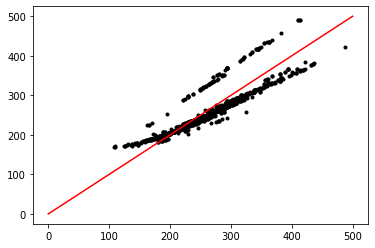

In [18]:
plt.plot(y, Y_Pred, '.k')
plt.plot(np.linspace(0,500,200), np.linspace(0,500,200), '-r')
plt.show()

In [19]:
print(reg.coef_, reg.intercept_, '\n\n', batchGDModel)

[[  8.57767262   7.698747   -10.59262337  -3.48918281  17.75286099
   -3.86924281]] [253.53120115] 

 [2.17182957 3.19811867 6.67263809 4.4501023  5.67418514 1.23592063
 0.29496927]


In [20]:
mean_y=np.mean(y)

In [21]:
# Goodness of fit R-Square
ss_t=0
ss_r=0
for i in range(len(y)):
    y_p=y_pred[i]
    ss_t+=(y[i]-mean_y)**2
    ss_r+=(y[i]-y_p)**2
r2=1-(ss_r/ss_t)
print(r2)

[0.88928611]


In [22]:
#the (euclidean) distance between two vectors
def distance(a,b):
    return np.linalg.norm(np.subtract(a,b))

#batch gradient descent
def batchGradientDescent_L2(X, y, model, learningRate,l2):
    count = 1
    while count < 2000:
        print(model)
        print(count)
        N_data = len(X)
        N_features = len(model) - 1

        weights = model[0:N_features]
        bias = model[N_features]

        weights_grad = np.zeros(N_features)
        bias_grad = 0

        for i in range(N_features):
            for j in range(N_data):
                weights_grad[i] += (2/N_data)*(np.dot(weights, X[j]) + bias - y[j])*X[j,i]
            weights_grad[i]=weights_grad[i]+2*l2*weights[i]
        for i in range(N_data):
            bias_grad += (2/N_data)*(np.dot(weights, X[i]) + bias - y[i])

        grad = np.append(weights_grad, [bias_grad])
        model = np.subtract(model, np.multiply(learningRate,grad))
        count += 1
    else:
        return model

In [23]:
guessModel = np.zeros(7)
learningRate = 0.00001

In [24]:
batchGDModel = batchGradientDescent_L2(X, y, guessModel, learningRate,5)

[0. 0. 0. 0. 0. 0. 0.]
1
[0.01871561 0.03162954 0.07280279 0.05160265 0.06328463 0.12692898
 0.00512457]
2
[0.03704549 0.06258892 0.14406998 0.10210921 0.12523095 0.25073935
 0.01013321]
3
[0.05499849 0.09289355 0.21383684 0.15154487 0.1858697  0.37150366
 0.01502858]
4
[0.07258324 0.12255849 0.28213782 0.19993424 0.24523092 0.48929276
 0.01981331]
5
[0.0898082  0.15159843 0.34900658 0.24730134 0.30334394 0.60417587
 0.02448996]
6
[0.10668161 0.18002775 0.414476   0.29366967 0.36023742 0.71622062
 0.02906102]
7
[0.12321153 0.20786047 0.47857819 0.33906216 0.41593937 0.82549304
 0.03352895]
8
[0.13940584 0.23511031 0.54134455 0.38350121 0.47047714 0.93205766
 0.03789611]
9
[0.15527221 0.26179065 0.6028057  0.42700872 0.52387743 1.0359775
 0.04216485]
10
[0.17081816 0.28791458 0.6629916  0.46960607 0.57616635 1.13731414
 0.04633744]
11
[0.18605104 0.31349488 0.7219315  0.51131414 0.62736939 1.2361277
 0.05041609]
12
[0.200978   0.33854402 0.77965395 0.55215334 0.67751147 1.33247694
 0.05

[0.85837892 1.4038172  3.24633311 2.28112584 2.81289308 4.53111325
 0.20861929]
104
[0.86171609 1.40882317 3.25803014 2.28914494 2.82293758 4.53626962
 0.2091763 ]
105
[0.86501587 1.41376545 3.26957989 2.29705937 2.83285393 4.54115829
 0.20972281]
106
[0.86827905 1.41864543 3.28098554 2.30487138 2.8426449  4.54578572
 0.21025906]
107
[0.87150643 1.42346448 3.2922502  2.3125832  2.85231318 4.55015825
 0.21078528]
108
[0.87469875 1.4282239  3.30337689 2.32019699 2.86186144 4.55428205
 0.21130172]
109
[0.87785677 1.43292501 3.31436859 2.32771486 2.87129224 4.55816315
 0.21180858]
110
[0.88098121 1.43756905 3.32522818 2.33513888 2.88060811 4.56180745
 0.21230609]
111
[0.88407278 1.44215727 3.3359585  2.34247107 2.88981152 4.56522071
 0.21279447]
112
[0.88713217 1.44669087 3.34656231 2.34971341 2.89890488 4.56840856
 0.21327392]
113
[0.89016007 1.45117103 3.3570423  2.35686781 2.90789053 4.57137647
 0.21374464]
114
[0.89315713 1.45559889 3.36740112 2.36393617 2.91677077 4.57412982
 0.214206

[1.0871885  1.72841277 4.00612508 2.79262572 3.46108845 4.36833422
 0.23642102]
204
[1.08889936 1.73071784 4.01150171 2.79617676 3.46564432 4.36371981
 0.23656151]
205
[1.09060429 1.73301377 4.01685618 2.7997124  3.47018106 4.35908924
 0.2367009 ]
206
[1.09230337 1.7353007  4.02218881 2.80323286 3.47469896 4.3544431
 0.23683921]
207
[1.09399668 1.73757878 4.02749992 2.80673836 3.47919829 4.34978198
 0.23697646]
208
[1.09568429 1.73984813 4.0327898  2.81022912 3.48367931 4.34510647
 0.23711268]
209
[1.09736629 1.74210888 4.03805877 2.81370535 3.48814228 4.34041712
 0.23724788]
210
[1.09904274 1.74436117 4.04330711 2.81716727 3.49258746 4.33571449
 0.2373821 ]
211
[1.10071372 1.74660511 4.04853512 2.82061508 3.49701509 4.33099911
 0.23751534]
212
[1.1023793  1.74884083 4.05374306 2.82404897 3.50142543 4.32627149
 0.23764764]
213
[1.10403955 1.75106845 4.05893122 2.82746914 3.50581872 4.32153216
 0.237779  ]
214
[1.10569454 1.75328808 4.06409986 2.83087579 3.51019517 4.31678161
 0.2379094

[1.2372879  1.92795294 4.46708353 3.09489676 3.85069908 3.88624385
 0.24735385]
304
[1.23862883 1.92972313 4.471122   3.09753029 3.85410586 3.88156287
 0.24744579]
305
[1.23996725 1.93148994 4.47515171 3.1001579  3.85750515 3.87688826
 0.24753755]
306
[1.24130317 1.93325339 4.47917269 3.10277963 3.860897   3.87222007
 0.24762913]
307
[1.2426366  1.9350135  4.48318499 3.1053955  3.86428144 3.86755833
 0.24772053]
308
[1.24396755 1.93677027 4.48718865 3.10800555 3.8676585  3.86290309
 0.24781175]
309
[1.24529603 1.93852374 4.49118371 3.1106098  3.87102823 3.85825438
 0.24790279]
310
[1.24662206 1.9402739  4.49517021 3.11320828 3.87439065 3.85361225
 0.24799367]
311
[1.24794564 1.9420208  4.49914819 3.11580103 3.8777458  3.84897673
 0.24808438]
312
[1.24926678 1.94376442 4.50311769 3.11838806 3.88109371 3.84434785
 0.24817491]
313
[1.25058549 1.94550481 4.50707875 3.1209694  3.88443443 3.83972566
 0.24826529]
314
[1.25190179 1.94724196 4.51103141 3.12354508 3.88776797 3.83511017
 0.248355

[1.36030516 2.09031869 4.83261943 3.33251033 4.15871968 3.45309464
 0.25588749]
404
[1.36143307 2.09180869 4.83592335 3.33465105 4.16150063 3.4491306
 0.2559677 ]
405
[1.36255911 2.09329628 4.83922092 3.33678753 4.16427618 3.44517374
 0.25604782]
406
[1.36368331 2.09478147 4.84251217 3.33891978 4.16704634 3.44122405
 0.25612786]
407
[1.36480565 2.09626427 4.84579709 3.3410478  4.16981112 3.43728154
 0.25620782]
408
[1.36592616 2.09774467 4.84907571 3.3431716  4.17257054 3.43334618
 0.2562877 ]
409
[1.36704482 2.09922269 4.85234804 3.34529121 4.17532461 3.42941797
 0.2563675 ]
410
[1.36816165 2.10069834 4.85561409 3.34740661 4.17807334 3.4254969
 0.25644722]
411
[1.36927665 2.10217161 4.85887388 3.34951784 4.18081674 3.42158296
 0.25652686]
412
[1.37038982 2.10364251 4.86212742 3.35162488 4.18355482 3.41767615
 0.25660642]
413
[1.37150117 2.10511105 4.86537473 3.35372776 4.1862876  3.41377645
 0.2566859 ]
414
[1.37261069 2.10657723 4.86861582 3.35582649 4.18901509 3.40988386
 0.2567653 

[1.4645032  2.22820287 5.13367572 3.52698416 4.41185853 3.09067443
 0.26354516]
504
[1.46546314 2.22947573 5.13640662 3.52874217 4.41415205 3.08737909
 0.26361837]
505
[1.46642156 2.23074664 5.13913235 3.53049672 4.41644118 3.08408989
 0.26369152]
506
[1.46737847 2.23201559 5.14185292 3.53224782 4.41872591 3.08080681
 0.26376461]
507
[1.46833386 2.23328258 5.14456833 3.53399549 4.42100627 3.07752985
 0.26383764]
508
[1.46928775 2.23454763 5.1472786  3.53573972 4.42328224 3.074259
 0.26391061]
509
[1.47024012 2.23581072 5.14998374 3.53748052 4.42555385 3.07099424
 0.26398352]
510
[1.47119099 2.23707188 5.15268375 3.5392179  4.4278211  3.06773557
 0.26405637]
511
[1.47214035 2.23833109 5.15537864 3.54095187 4.43008401 3.06448297
 0.26412916]
512
[1.47308822 2.23958837 5.15806843 3.54268244 4.43234257 3.06123643
 0.26420189]
513
[1.47403459 2.24084372 5.16075313 3.5444096  4.4345968  3.05799595
 0.26427456]
514
[1.47497946 2.24209714 5.16343274 3.54613337 4.4368467  3.05476151
 0.26434717

[1.55341452 2.34634868 5.38267671 3.68670941 4.62072631 2.78980174
 0.27058337]
604
[1.55423572 2.3474425  5.38493598 3.68815272 4.62261879 2.78706803
 0.27065105]
605
[1.55505565 2.34853468 5.38719096 3.68959317 4.62450763 2.78433944
 0.27071868]
606
[1.55587433 2.34962524 5.38944168 3.69103078 4.62639284 2.78161594
 0.27078626]
607
[1.55669175 2.35071418 5.39168813 3.69246553 4.62827442 2.77889753
 0.27085378]
608
[1.55750792 2.3518015  5.39393032 3.69389745 4.63015238 2.77618421
 0.27092126]
609
[1.55832283 2.3528872  5.39616826 3.69532654 4.63202672 2.77347595
 0.27098869]
610
[1.5591365  2.35397129 5.39840196 3.6967528  4.63389746 2.77077275
 0.27105607]
611
[1.55994891 2.35505377 5.40063143 3.69817623 4.63576461 2.76807461
 0.2711234 ]
612
[1.56076008 2.35613464 5.40285667 3.69959684 4.63762816 2.7653815
 0.27119068]
613
[1.56157001 2.35721391 5.4050777  3.70101464 4.63948812 2.76269343
 0.27125792]
614
[1.5623787  2.35829158 5.40729451 3.70242964 4.6413445  2.76001039
 0.2713251

[1.62894293 2.44718809 5.58678114 3.81655065 4.7914497  2.54251625
 0.27705497]
703
[1.62964987 2.44813441 5.58865326 3.81773581 4.79301305 2.54024472
 0.27711813]
704
[1.63035577 2.44907938 5.59052183 3.81891859 4.79457337 2.53797743
 0.27718124]
705
[1.63106061 2.45002299 5.59238685 3.82009901 4.79613069 2.53571438
 0.27724432]
706
[1.63176441 2.45096526 5.59424832 3.82127707 4.79768499 2.53345556
 0.27730735]
707
[1.63246716 2.45190617 5.59610626 3.82245277 4.79923628 2.53120096
 0.27737034]
708
[1.63316887 2.45284573 5.59796067 3.82362611 4.80078458 2.52895057
 0.27743329]
709
[1.63386954 2.45378395 5.59981156 3.82479711 4.80232988 2.5267044
 0.27749619]
710
[1.63456917 2.45472083 5.60165894 3.82596577 4.80387219 2.52446241
 0.27755906]
711
[1.63526776 2.45565637 5.6035028  3.82713209 4.80541152 2.52222462
 0.27762188]
712
[1.63596532 2.45659057 5.60534317 3.82829607 4.80694788 2.51999102
 0.27768467]
713
[1.63666184 2.45752343 5.60718003 3.82945772 4.80848126 2.51776158
 0.2777474

[1.69473312 2.53548652 5.75742414 3.92402353 4.9337013  2.33515121
 0.28317697]
803
[1.69534395 2.5363087  5.75897177 3.92499246 4.93498884 2.33326723
 0.28323633]
804
[1.69595391 2.53712976 5.76051645 3.92595941 4.93627389 2.33138678
 0.28329566]
805
[1.696563   2.53794968 5.76205818 3.92692441 4.93755643 2.32950984
 0.28335496]
806
[1.69717121 2.53876848 5.76359698 3.92788745 4.93883648 2.32763641
 0.28341422]
807
[1.69777856 2.53958615 5.76513285 3.92884854 4.94011404 2.32576648
 0.28347345]
808
[1.69838504 2.5404027  5.76666579 3.92980769 4.94138911 2.32390004
 0.28353264]
809
[1.69899065 2.54121813 5.76819582 3.93076488 4.9426617  2.32203709
 0.2835918 ]
810
[1.69959539 2.54203244 5.76972293 3.93172014 4.94393181 2.32017762
 0.28365093]
811
[1.70019927 2.54284564 5.77124713 3.93267345 4.94519945 2.31832163
 0.28371002]
812
[1.70080229 2.54365772 5.77276842 3.93362484 4.94646462 2.31646911
 0.28376907]
813
[1.70140445 2.54446869 5.77428682 3.93457429 4.94772733 2.31462005
 0.283828

[1.7517336  2.61242763 5.89845023 4.01176827 5.05078372 2.16316342
 0.28895293]
903
[1.75226441 2.61314637 5.89972884 4.01255807 5.05184268 2.16160083
 0.28900915]
904
[1.7527945  2.61386417 5.901005   4.01334625 5.05289957 2.16004116
 0.28906534]
905
[1.75332385 2.61458103 5.90227873 4.0141328  5.05395439 2.1584844
 0.2891215 ]
906
[1.75385248 2.61529695 5.90355002 4.01491773 5.05500714 2.15693055
 0.28917764]
907
[1.75438039 2.61601193 5.90481888 4.01570105 5.05605782 2.15537961
 0.28923375]
908
[1.75490757 2.61672598 5.90608531 4.01648275 5.05710644 2.15383156
 0.28928982]
909
[1.75543403 2.61743909 5.90734933 4.01726284 5.05815301 2.15228641
 0.28934587]
910
[1.75595977 2.61815127 5.90861092 4.01804133 5.05919753 2.15074414
 0.2894019 ]
911
[1.75648478 2.61886252 5.90987011 4.0188182  5.06023999 2.14920476
 0.28945789]
912
[1.75700909 2.61957285 5.91112689 4.01959348 5.06128041 2.14766825
 0.28951386]
913
[1.75753267 2.62028224 5.91238127 4.02036716 5.06231879 2.14613461
 0.2895697

[1.80141306 2.67990146 6.01492318 4.08317234 5.14700675 2.02051204
 0.29444188]
1003
[1.8018772  2.68053393 6.01597877 4.08381379 5.14787628 2.01921595
 0.2944955 ]
1004
[1.80234072 2.68116562 6.01703233 4.0844539  5.14874409 2.01792229
 0.29454909]
1005
[1.80280364 2.68179652 6.01808387 4.08509267 5.14961018 2.01663104
 0.29460265]
1006
[1.80326595 2.68242664 6.01913339 4.08573009 5.15047456 2.01534221
 0.29465619]
1007
[1.80372766 2.68305598 6.0201809  4.08636617 5.15133723 2.01405578
 0.29470971]
1008
[1.80418877 2.68368454 6.0212264  4.08700092 5.15219819 2.01277176
 0.29476321]
1009
[1.80464927 2.68431231 6.02226989 4.08763433 5.15305745 2.01149013
 0.29481668]
1010
[1.80510917 2.68493931 6.02331138 4.08826641 5.15391501 2.0102109
 0.29487013]
1011
[1.80556848 2.68556554 6.02435086 4.08889717 5.15477087 2.00893406
 0.29492355]
1012
[1.80602718 2.68619098 6.02538836 4.08952659 5.15562503 2.0076596
 0.29497695]
1013
[1.80648529 2.68681566 6.02642386 4.09015469 5.1564775  2.00638753


[1.84498978 2.7394759  6.11104182 4.14104442 5.22594394 1.90218759
 0.29969279]
1103
[1.8453983  2.74003635 6.11191253 4.14156304 5.2266565  1.9011125
 0.29974424]
1104
[1.84580632 2.74059614 6.11278157 4.14208054 5.22736764 1.90003943
 0.29979567]
1105
[1.84621383 2.74115529 6.11364892 4.14259694 5.22807735 1.89896835
 0.29984708]
1106
[1.84662083 2.74171377 6.11451461 4.14311222 5.22878564 1.89789927
 0.29989847]
1107
[1.84702733 2.7422716  6.11537862 4.1436264  5.22949251 1.8968322
 0.29994984]
1108
[1.84743333 2.74282878 6.11624097 4.14413947 5.23019797 1.89576711
 0.30000119]
1109
[1.84783882 2.74338531 6.11710166 4.14465143 5.23090202 1.89470401
 0.30005253]
1110
[1.84824382 2.74394119 6.11796068 4.14516229 5.23160466 1.8936429
 0.30010384]
1111
[1.84864831 2.74449642 6.11881805 4.14567205 5.23230589 1.89258377
 0.30015513]
1112
[1.8490523  2.74505101 6.11967376 4.14618071 5.23300572 1.89152662
 0.30020641]
1113
[1.8494558  2.74560495 6.12052782 4.14668828 5.23370414 1.89047144
 

[1.88238556 2.79094767 6.1881271  4.18645691 5.28880381 1.80672154
 0.30459716]
1200
[1.88274893 2.79144957 6.18884876 4.18687663 5.28938987 1.8058247
 0.30464686]
1201
[1.88311188 2.79195093 6.18956902 4.18729543 5.28997475 1.80492954
 0.30469655]
1202
[1.8834744  2.79245173 6.19028788 4.18771329 5.29055844 1.80403604
 0.30474622]
1203
[1.88383649 2.79295198 6.19100534 4.18813024 5.29114094 1.80314421
 0.30479588]
1204
[1.88419817 2.79345168 6.19172142 4.18854626 5.29172227 1.80225405
 0.30484552]
1205
[1.88455942 2.79395084 6.1924361  4.18896136 5.29230241 1.80136555
 0.30489514]
1206
[1.88492025 2.79444945 6.1931494  4.18937553 5.29288138 1.80047871
 0.30494475]
1207
[1.88528065 2.79494751 6.19386132 4.1897888  5.29345918 1.79959353
 0.30499434]
1208
[1.88564064 2.79544502 6.19457185 4.19020114 5.2940358  1.79870999
 0.30504392]
1209
[1.88600021 2.79594199 6.195281   4.19061258 5.29461126 1.79782811
 0.30509348]
1210
[1.88635936 2.79643842 6.19598878 4.19102309 5.29518555 1.79694787

[1.91640869 2.83810419 6.25317505 4.22377095 5.3413983  1.72558602
 0.30944305]
1299
[1.9167334  2.8385559  6.25377014 4.22410683 5.341877   1.72484061
 0.30949127]
1300
[1.91705776 2.83900715 6.25436406 4.22444193 5.34235472 1.7240966
 0.30953948]
1301
[1.91738176 2.83945793 6.25495682 4.22477626 5.34283145 1.72335397
 0.30958768]
1302
[1.9177054  2.83990825 6.25554842 4.22510983 5.3433072  1.72261273
 0.30963586]
1303
[1.91802869 2.84035811 6.25613887 4.22544263 5.34378198 1.72187287
 0.30968403]
1304
[1.91835163 2.84080751 6.25672816 4.22577467 5.34425577 1.72113439
 0.30973218]
1305
[1.91867421 2.84125645 6.2573163  4.22610595 5.34472859 1.72039729
 0.30978032]
1306
[1.91899644 2.84170493 6.25790329 4.22643647 5.34520043 1.71966156
 0.30982845]
1307
[1.91931832 2.84215296 6.25848914 4.22676622 5.3456713  1.71892721
 0.30987656]
1308
[1.91963984 2.84260052 6.25907384 4.22709522 5.3461412  1.71819423
 0.30992466]
1309
[1.91996101 2.84304763 6.2596574  4.22742347 5.34661013 1.71746262

[1.9472123  2.88110677 6.30726713 4.25377575 5.38467719 1.65752808
 0.31420175]
1399
[1.9475043  2.88151593 6.30775614 4.2540415  5.38506599 1.65690964
 0.31424873]
1400
[1.947796   2.8819247  6.3082442  4.2543066  5.38545397 1.65629236
 0.3142957 ]
1401
[1.9480874  2.88233308 6.30873129 4.25457107 5.38584114 1.65567622
 0.31434265]
1402
[1.9483785  2.88274107 6.30921742 4.25483491 5.3862275  1.65506123
 0.3143896 ]
1403
[1.9486693  2.88314868 6.30970259 4.25509812 5.38661304 1.65444739
 0.31443653]
1404
[1.94895981 2.8835559  6.31018681 4.25536069 5.38699778 1.6538347
 0.31448345]
1405
[1.94925002 2.88396274 6.31067008 4.25562263 5.3873817  1.65322314
 0.31453036]
1406
[1.94953994 2.88436919 6.31115239 4.25588395 5.38776482 1.65261273
 0.31457726]
1407
[1.94982956 2.88477525 6.31163375 4.25614463 5.38814713 1.65200346
 0.31462415]
1408
[1.95011889 2.88518093 6.31211416 4.2564047  5.38852864 1.65139532
 0.31467103]
1409
[1.95040792 2.88558623 6.31259363 4.25666413 5.38890935 1.65078831

[1.97501422 2.92020179 6.35168026 4.27738792 5.41975514 1.60105981
 0.31884686]
1499
[1.97527879 2.9205752  6.35208138 4.27759568 5.4200695  1.60054665
 0.31889281]
1500
[1.97554311 2.92094829 6.3524817  4.27780292 5.42038318 1.60003445
 0.31893874]
1501
[1.97580718 2.92132105 6.35288123 4.27800963 5.42069618 1.59952321
 0.31898467]
1502
[1.97607099 2.92169349 6.35327996 4.27821581 5.42100852 1.59901292
 0.31903059]
1503
[1.97633456 2.9220656  6.35367789 4.27842148 5.42132018 1.59850358
 0.3190765 ]
1504
[1.97659788 2.92243738 6.35407503 4.27862662 5.42163117 1.59799519
 0.31912239]
1505
[1.97686095 2.92280884 6.35447139 4.27883124 5.42194149 1.59748775
 0.31916828]
1506
[1.97712377 2.92317998 6.35486695 4.27903534 5.42225114 1.59698125
 0.31921417]
1507
[1.97738634 2.92355079 6.35526172 4.27923892 5.42256013 1.5964757
 0.31926004]
1508
[1.97764867 2.92392129 6.35565571 4.27944198 5.42286845 1.59597109
 0.3193059 ]
1509
[1.97791075 2.92429145 6.35604892 4.27964453 5.4231761  1.59546742

[2.00029716 2.95601084 6.38807287 4.29571612 5.44804328 1.55420228
 0.32339771]
1599
[2.00053869 2.95635416 6.38840115 4.29587597 5.44829601 1.55377643
 0.3234428 ]
1600
[2.00078    2.95669721 6.38872878 4.29603538 5.44854818 1.55335138
 0.32348788]
1601
[2.00102111 2.95703998 6.38905574 4.29619437 5.4487998  1.55292712
 0.32353296]
1602
[2.001262   2.95738247 6.38938205 4.29635291 5.44905086 1.55250365
 0.32357802]
1603
[2.00150268 2.95772469 6.3897077  4.29651103 5.44930136 1.55208097
 0.32362308]
1604
[2.00174316 2.95806664 6.39003269 4.29666872 5.4495513  1.55165907
 0.32366813]
1605
[2.00198342 2.95840831 6.39035703 4.29682597 5.44980069 1.55123796
 0.32371317]
1606
[2.00222348 2.95874972 6.39068071 4.2969828  5.45004953 1.55081764
 0.32375821]
1607
[2.00246333 2.95909084 6.39100374 4.2971392  5.45029782 1.5503981
 0.32380324]
1608
[2.00270297 2.9594317  6.39132612 4.29729517 5.45054556 1.54997934
 0.32384826]
1609
[2.0029424  2.95977228 6.39164785 4.29745071 5.45079274 1.54956136

[2.02346179 2.98904997 6.41782005 4.30967946 5.47071162 1.51531451
 0.32787034]
1699
[2.02368391 2.98936789 6.418088   4.30979975 5.47091336 1.51496107
 0.32791472]
1700
[2.02390586 2.98968558 6.41835539 4.30991968 5.47111463 1.51460829
 0.32795909]
1701
[2.02412763 2.99000303 6.41862224 4.31003925 5.47131544 1.51425616
 0.32800346]
1702
[2.02434922 2.99032025 6.41888855 4.31015846 5.47151579 1.51390468
 0.32804782]
1703
[2.02457064 2.99063724 6.41915431 4.31027732 5.47171568 1.51355386
 0.32809217]
1704
[2.02479188 2.99095399 6.41941953 4.31039582 5.47191511 1.5132037
 0.32813652]
1705
[2.02501294 2.99127052 6.4196842  4.31051396 5.47211408 1.51285418
 0.32818086]
1706
[2.02523383 2.99158681 6.41994833 4.31063175 5.4723126  1.51250532
 0.32822519]
1707
[2.02545454 2.99190288 6.42021192 4.31074919 5.47251065 1.5121571
 0.32826952]
1708
[2.02567507 2.99221871 6.42047498 4.31086627 5.47270825 1.51180953
 0.32831384]
1709
[2.02589543 2.99253432 6.42073749 4.31098301 5.4729054  1.51146261


[2.04463483 3.01945109 6.44184362 4.31995194 5.4885703  1.48332972
 0.33223426]
1798
[2.04484073 3.0197477  6.44206204 4.32003988 5.48873024 1.48303577
 0.33227805]
1799
[2.04504648 3.02004411 6.44228    4.32012752 5.48888979 1.48274237
 0.33232184]
1800
[2.04525208 3.02034033 6.44249751 4.32021487 5.48904896 1.48244951
 0.33236562]
1801
[2.04545753 3.02063634 6.44271457 4.32030193 5.48920774 1.4821572
 0.3324094 ]
1802
[2.04566283 3.02093216 6.44293117 4.32038868 5.48936614 1.48186543
 0.33245317]
1803
[2.04586798 3.02122779 6.44314732 4.32047515 5.48952417 1.4815742
 0.33249694]
1804
[2.04607298 3.02152321 6.44336303 4.32056132 5.48968181 1.48128351
 0.3325407 ]
1805
[2.04627783 3.02181844 6.44357828 4.3206472  5.48983908 1.48099337
 0.33258446]
1806
[2.04648253 3.02211348 6.44379308 4.32073278 5.48999596 1.48070376
 0.33262821]
1807
[2.04668708 3.02240832 6.44400744 4.32081808 5.49015247 1.48041469
 0.33267195]
1808
[2.04689148 3.02270296 6.44422135 4.32090308 5.4903086  1.48012616


[2.06451821 3.04818165 6.46156732 4.32736798 5.50277841 1.45648174
 0.33658857]
1898
[2.06471022 3.04845996 6.46174427 4.32742896 5.5029034  1.45623767
 0.33663187]
1899
[2.0649021  3.0487381  6.46192083 4.3274897  5.50302807 1.45599406
 0.33667517]
1900
[2.06509386 3.04901608 6.46209703 4.3275502  5.50315242 1.45575089
 0.33671846]
1901
[2.06528549 3.04929388 6.46227284 4.32761045 5.50327646 1.45550818
 0.33676175]
1902
[2.06547699 3.04957152 6.46244829 4.32767046 5.50340018 1.45526593
 0.33680504]
1903
[2.06566836 3.04984899 6.46262336 4.32773022 5.50352359 1.45502412
 0.33684832]
1904
[2.06585961 3.05012629 6.46279805 4.32778975 5.50364669 1.45478276
 0.33689159]
1905
[2.06605073 3.05040343 6.46297238 4.32784903 5.50376947 1.45454184
 0.33693486]
1906
[2.06624173 3.0506804  6.46314633 4.32790807 5.50389194 1.45430138
 0.33697813]
1907
[2.0664326  3.0509572  6.46331991 4.32796687 5.5040141  1.45406136
 0.33702139]
1908
[2.06662334 3.05123384 6.46349313 4.32802544 5.50413594 1.4538217

[2.08293914 3.07495693 6.47736513 4.33229246 5.51370541 1.43439029
 0.34085514]
1997
[2.08311946 3.07521978 6.47750804 4.33233144 5.51380178 1.43418722
 0.34089804]
1998
[2.08329967 3.07548249 6.47765065 4.33237023 5.51389789 1.43398452
 0.34094094]
1999


In [25]:
batchGDModel

array([2.08347978, 3.07574505, 6.47779295, 4.33240882, 5.51399374,
       1.43378219, 0.34098383])

In [26]:
Y_Pred = np.zeros(1067)
for i in range(1067):
    Y_Pred[i] = np.dot(batchGDModel[0:6], X[i]) + batchGDModel[6]

In [27]:
print(reg.coef_, reg.intercept_, '\n\n', batchGDModel)

[[  8.57767262   7.698747   -10.59262337  -3.48918281  17.75286099
   -3.86924281]] [253.53120115] 

 [2.08347978 3.07574505 6.47779295 4.33240882 5.51399374 1.43378219
 0.34098383]


In [28]:
mean_y=np.mean(y)

In [29]:
# Goodness of fit R-Square
ss_t=0
ss_r=0
for i in range(len(y)):
    y_p=y_pred[i]
    ss_t+=(y[i]-mean_y)**2
    ss_r+=(y[i]-y_p)**2
r2=1-(ss_r/ss_t)
print(r2)

[0.88928611]


In [30]:
#the (euclidean) distance between two vectors
def distance(a,b):
    return np.linalg.norm(np.subtract(a,b))

#batch gradient descent
def batchGradientDescent_L1(X, y, model, learningRate,l1):
    count = 1
    while count < 2000:
        print(model)
        print(count)
        N_data = len(X)
        N_features = len(model) - 1

        weights = model[0:N_features]
        bias = model[N_features]

        weights_grad = np.zeros(N_features)
        bias_grad = 0

        for i in range(N_features):
            for j in range(N_data):
                weights_grad[i] += (2/N_data)*(np.dot(weights, X[j]) + bias - y[j])*X[j,i]
            weights_grad[i]=weights_grad[i]+2*l1*np.sign(weights[i])
        for i in range(N_data):
            bias_grad += (2/N_data)*(np.dot(weights, X[i]) + bias - y[i])

        grad = np.append(weights_grad, [bias_grad])
        model = np.subtract(model, np.multiply(learningRate,grad))
        count += 1
    else:
        return model


In [31]:
guessModel = np.zeros(7)
learningRate = 0.00001

In [ ]:
batchGDModel = batchGradientDescent_L2(X, y, guessModel, learningRate,5)

[0. 0. 0. 0. 0. 0. 0.]
1
[0.01871561 0.03162954 0.07280279 0.05160265 0.06328463 0.12692898
 0.00512457]
2
[0.03704549 0.06258892 0.14406998 0.10210921 0.12523095 0.25073935
 0.01013321]
3
[0.05499849 0.09289355 0.21383684 0.15154487 0.1858697  0.37150366
 0.01502858]
4
[0.07258324 0.12255849 0.28213782 0.19993424 0.24523092 0.48929276
 0.01981331]
5
[0.0898082  0.15159843 0.34900658 0.24730134 0.30334394 0.60417587
 0.02448996]
6
[0.10668161 0.18002775 0.414476   0.29366967 0.36023742 0.71622062
 0.02906102]
7
[0.12321153 0.20786047 0.47857819 0.33906216 0.41593937 0.82549304
 0.03352895]
8
[0.13940584 0.23511031 0.54134455 0.38350121 0.47047714 0.93205766
 0.03789611]
9
[0.15527221 0.26179065 0.6028057  0.42700872 0.52387743 1.0359775
 0.04216485]
10
[0.17081816 0.28791458 0.6629916  0.46960607 0.57616635 1.13731414
 0.04633744]
11
[0.18605104 0.31349488 0.7219315  0.51131414 0.62736939 1.2361277
 0.05041609]
12
[0.200978   0.33854402 0.77965395 0.55215334 0.67751147 1.33247694
 0.05

[0.84813483 1.38840285 3.21032547 2.25641695 2.78196197 4.51397079
 0.2068828 ]
101
[0.85158914 1.39360852 3.22248414 2.26476425 2.79240821 4.5199707
 0.2074728 ]
102
[0.85500355 1.39874614 3.23448556 2.27299973 2.80271759 4.52568254
 0.20805154]
103
[0.85837892 1.4038172  3.24633311 2.28112584 2.81289308 4.53111325
 0.20861929]
104
[0.86171609 1.40882317 3.25803014 2.28914494 2.82293758 4.53626962
 0.2091763 ]
105
[0.86501587 1.41376545 3.26957989 2.29705937 2.83285393 4.54115829
 0.20972281]
106
[0.86827905 1.41864543 3.28098554 2.30487138 2.8426449  4.54578572
 0.21025906]
107
[0.87150643 1.42346448 3.2922502  2.3125832  2.85231318 4.55015825
 0.21078528]
108
[0.87469875 1.4282239  3.30337689 2.32019699 2.86186144 4.55428205
 0.21130172]
109
[0.87785677 1.43292501 3.31436859 2.32771486 2.87129224 4.55816315
 0.21180858]
110
[0.88098121 1.43756905 3.32522818 2.33513888 2.88060811 4.56180745
 0.21230609]
111
[0.88407278 1.44215727 3.3359585  2.34247107 2.88981152 4.56522071
 0.2127944

[1.08374865 1.72377468 3.99530404 2.78547647 3.45191818 4.37751205
 0.23613664]
202
[1.08547162 1.72609844 4.00072597 2.78905903 3.45651317 4.37293185
 0.23627941]
203
[1.0871885  1.72841277 4.00612508 2.79262572 3.46108845 4.36833422
 0.23642102]
204
[1.08889936 1.73071784 4.01150171 2.79617676 3.46564432 4.36371981
 0.23656151]
205
[1.09060429 1.73301377 4.01685618 2.7997124  3.47018106 4.35908924
 0.2367009 ]
206
[1.09230337 1.7353007  4.02218881 2.80323286 3.47469896 4.3544431
 0.23683921]
207
[1.09399668 1.73757878 4.02749992 2.80673836 3.47919829 4.34978198
 0.23697646]
208
[1.09568429 1.73984813 4.0327898  2.81022912 3.48367931 4.34510647
 0.23711268]
209
[1.09736629 1.74210888 4.03805877 2.81370535 3.48814228 4.34041712
 0.23724788]
210
[1.09904274 1.74436117 4.04330711 2.81716727 3.49258746 4.33571449
 0.2373821 ]
211
[1.10071372 1.74660511 4.04853512 2.82061508 3.49701509 4.33099911
 0.23751534]
212
[1.1023793  1.74884083 4.05374306 2.82404897 3.50142543 4.32627149
 0.2376476

[1.23459844 1.92440233 4.4589801  3.08961184 3.84386291 3.89562474
 0.24716941]
302
[1.23594444 1.92617934 4.46303624 3.09225729 3.84728477 3.89093116
 0.24726173]
303
[1.2372879  1.92795294 4.46708353 3.09489676 3.85069908 3.88624385
 0.24735385]
304
[1.23862883 1.92972313 4.471122   3.09753029 3.85410586 3.88156287
 0.24744579]
305
[1.23996725 1.93148994 4.47515171 3.1001579  3.85750515 3.87688826
 0.24753755]
306
[1.24130317 1.93325339 4.47917269 3.10277963 3.860897   3.87222007
 0.24762913]
307
[1.2426366  1.9350135  4.48318499 3.1053955  3.86428144 3.86755833
 0.24772053]
308
[1.24396755 1.93677027 4.48718865 3.10800555 3.8676585  3.86290309
 0.24781175]
309
[1.24529603 1.93852374 4.49118371 3.1106098  3.87102823 3.85825438
 0.24790279]
310
[1.24662206 1.9402739  4.49517021 3.11320828 3.87439065 3.85361225
 0.24799367]
311
[1.24794564 1.9420208  4.49914819 3.11580103 3.8777458  3.84897673
 0.24808438]
312
[1.24926678 1.94376442 4.50311769 3.11838806 3.88109371 3.84434785
 0.248174

[1.35804378 2.08733146 4.82599249 3.32821612 4.15314153 3.46104431
 0.25572683]
402
[1.3591754  2.08882629 4.82930915 3.33036536 4.15593331 3.45706588
 0.2558072 ]
403
[1.36030516 2.09031869 4.83261943 3.33251033 4.15871968 3.45309464
 0.25588749]
404
[1.36143307 2.09180869 4.83592335 3.33465105 4.16150063 3.4491306
 0.2559677 ]
405
[1.36255911 2.09329628 4.83922092 3.33678753 4.16427618 3.44517374
 0.25604782]
406
[1.36368331 2.09478147 4.84251217 3.33891978 4.16704634 3.44122405
 0.25612786]
407
[1.36480565 2.09626427 4.84579709 3.3410478  4.16981112 3.43728154
 0.25620782]
408
[1.36592616 2.09774467 4.84907571 3.3431716  4.17257054 3.43334618
 0.2562877 ]
409
[1.36704482 2.09922269 4.85234804 3.34529121 4.17532461 3.42941797
 0.2563675 ]
410
[1.36816165 2.10069834 4.85561409 3.34740661 4.17807334 3.4254969
 0.25644722]
411
[1.36927665 2.10217161 4.85887388 3.34951784 4.18081674 3.42158296
 0.25652686]
412
[1.37038982 2.10364251 4.86212742 3.35162488 4.18355482 3.41767615
 0.25660642

[1.46257874 2.22565123 5.12819835 3.52345777 4.40725824 3.09728358
 0.26339854]
502
[1.46354173 2.22692803 5.13093963 3.5252227  4.40956059 3.09397593
 0.26347188]
503
[1.4645032  2.22820287 5.13367572 3.52698416 4.41185853 3.09067443
 0.26354516]
504
[1.46546314 2.22947573 5.13640662 3.52874217 4.41415205 3.08737909
 0.26361837]
505
[1.46642156 2.23074664 5.13913235 3.53049672 4.41644118 3.08408989
 0.26369152]
506
[1.46737847 2.23201559 5.14185292 3.53224782 4.41872591 3.08080681
 0.26376461]
507
[1.46833386 2.23328258 5.14456833 3.53399549 4.42100627 3.07752985
 0.26383764]
508
[1.46928775 2.23454763 5.1472786  3.53573972 4.42328224 3.074259
 0.26391061]
509
[1.47024012 2.23581072 5.14998374 3.53748052 4.42555385 3.07099424
 0.26398352]
510
[1.47119099 2.23707188 5.15268375 3.5392179  4.4278211  3.06773557
 0.26405637]
511
[1.47214035 2.23833109 5.15537864 3.54095187 4.43008401 3.06448297
 0.26412916]
512
[1.47308822 2.23958837 5.15806843 3.54268244 4.43234257 3.06123643
 0.26420189

[1.55176833 2.34415616 5.3781453  3.6838142  4.61693041 2.79528451
 0.27044786]
602
[1.55259206 2.34525324 5.38041315 3.68526324 4.61883019 2.79254056
 0.27051564]
603
[1.55341452 2.34634868 5.38267671 3.68670941 4.62072631 2.78980174
 0.27058337]
604
[1.55423572 2.3474425  5.38493598 3.68815272 4.62261879 2.78706803
 0.27065105]
605
[1.55505565 2.34853468 5.38719096 3.68959317 4.62450763 2.78433944
 0.27071868]
606
[1.55587433 2.34962524 5.38944168 3.69103078 4.62639284 2.78161594
 0.27078626]
607
[1.55669175 2.35071418 5.39168813 3.69246553 4.62827442 2.77889753
 0.27085378]
608
[1.55750792 2.3518015  5.39393032 3.69389745 4.63015238 2.77618421
 0.27092126]
609
[1.55832283 2.3528872  5.39616826 3.69532654 4.63202672 2.77347595
 0.27098869]
610
[1.5591365  2.35397129 5.39840196 3.6967528  4.63389746 2.77077275
 0.27105607]
611
[1.55994891 2.35505377 5.40063143 3.69817623 4.63576461 2.76807461
 0.2711234 ]
612
[1.56076008 2.35613464 5.40285667 3.69959684 4.63762816 2.7653815
 0.2711906

[1.62752587 2.44529135 5.5830262  3.81417322 4.78831391 2.54707209
 0.27692854]
701
[1.62823493 2.4462404  5.58490545 3.81536313 4.78988332 2.54479204
 0.27699178]
702
[1.62894293 2.44718809 5.58678114 3.81655065 4.7914497  2.54251625
 0.27705497]
703
[1.62964987 2.44813441 5.58865326 3.81773581 4.79301305 2.54024472
 0.27711813]
704
[1.63035577 2.44907938 5.59052183 3.81891859 4.79457337 2.53797743
 0.27718124]
705


In [ ]:
batchGDModel

In [ ]:
Y_Pred = np.zeros(1067)
for i in range(1067):
    Y_Pred[i] = np.dot(batchGDModel[0:6], X[i]) + batchGDModel[6]

In [ ]:
print(reg.coef_, reg.intercept_, '\n\n', batchGDModel)

In [ ]:
batchGDModel

In [ ]:
mean_y=np.mean(y)

In [ ]:
# Goodness of fit R-Square
ss_t=0
ss_r=0
for i in range(len(y)):
    y_p=y_pred[i]
    ss_t+=(y[i]-mean_y)**2
    ss_r+=(y[i]-y_p)**2
r2=1-(ss_r/ss_t)
print(r2)

L1 regularization: It adds an L1 penalty that is equal to the absolute value of the magnitude of coefficient, or simply restricting the size of coefficients. For example, Lasso regression implements this method. 

L2 Regularization: It adds an L2 penalty which is equal to the square of the magnitude of coefficients. For example, Ridge regression and SVM implement this method.

L1 regularization is the preferred choice when having a high number of features as it provides sparse solutions. Even, we obtain the computational advantage because features with zero coefficients can be avoided.

L2 regularization can deal with the multicollinearity (independent variables are highly correlated) problems through constricting the coefficient and by keeping all the variables. 

 

L2 regression can be used to estimate the significance of predictors and based on that it can penalize the insignificant predictors.

L1 regularization attempts to estimate the median of data, L2 regularization makes estimation for the mean of the data in order to evade overfitting.

 

Through including the absolute value of weight parameters, L1 regularization can add the penalty term in cost function. On the other hand, L2 regularization appends the squared value of weights in the cost function.

 


 